In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sympy import diff
from sympy.abc import b, w

In [117]:
X = np.arange(1, 101)
Y = 5 * X + np.random.randint(-20, 20, 100)


In [118]:
X

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [119]:
Y

array([  1,  -2,  26,  21,  12,  31,  38,  41,  61,  33,  50,  78,  50,
        87,  64,  64,  86, 103,  90,  95, 118, 122,  95, 100, 137, 140,
       127, 134, 127, 153, 164, 164, 179, 155, 172, 179, 170, 172, 199,
       187, 212, 215, 234, 216, 235, 249, 223, 237, 232, 235, 264, 270,
       282, 289, 266, 273, 271, 302, 294, 306, 315, 300, 321, 321, 331,
       321, 331, 335, 332, 350, 337, 355, 375, 381, 372, 380, 368, 393,
       395, 393, 399, 410, 413, 421, 417, 425, 450, 438, 455, 468, 455,
       441, 448, 464, 475, 465, 478, 481, 495, 498])

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

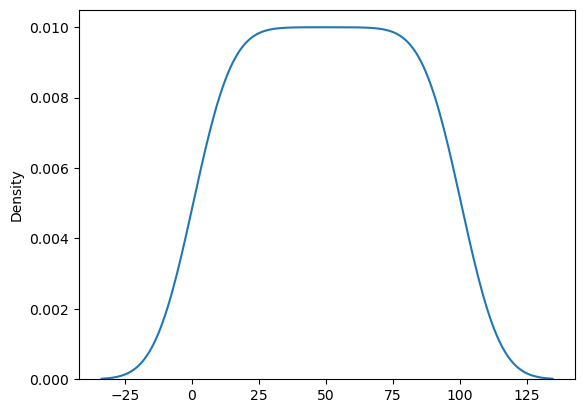

In [120]:
sns.kdeplot(X)

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

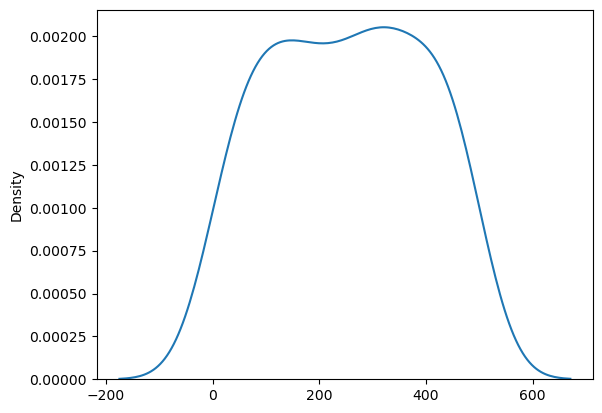

In [121]:
sns.kdeplot(Y)

In [122]:
X_Y = pd.DataFrame({'X':X, 'Y':Y})
X_Y

,X,Y
0,1,1
1,2,-2
2,3,26
3,4,21
4,5,12
...,...,...
95,96,465
96,97,478
97,98,481
98,99,495


<Axes: >

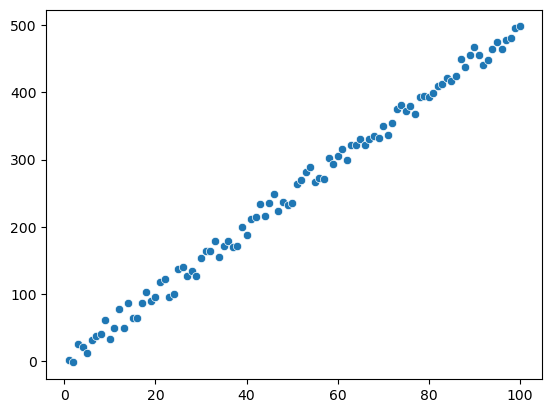

In [123]:
sns.scatterplot(X_Y, x=X, y=Y)

In [124]:
losses = lambda x_y, w, b: np.sum((w * x_y.iloc[:,0] + b - x_y.iloc[:,1]) ** 2 / (2 * x_y.shape[0]))

In [125]:
losses(X_Y, 0, 0)

41950.369999999995

In [126]:
dw = diff(losses(X_Y, w, b), w)

In [127]:
db = diff(losses(X_Y, w, b), b)

In [128]:
print(dw, db, sep='\n')

101*b/2 + 6767*w/2 - 1683719/100
b + 101*w/2 - 2513/10


In [129]:
cf_w = int(str(dw).split(' ')[-1].split('/')[0]) / int(str(dw).split(' ')[-1].split('/')[1])
cf_b = int(str(db).split(' ')[-1].split('/')[0]) / int(str(db).split(' ')[-1].split('/')[1])

In [130]:
f_dw = lambda b, w: 50.5 * b + 3383.5 * w - cf_w
f_db = lambda b, w: b + 50.5 * w - cf_b

<i>Я не нашёл лучшего способа, как извлечь коэффициенты из производной</i>

In [131]:
x_y_0 = np.array([0, 0])
f_dw(x_y_0[1], x_y_0[0])

-16837.19

In [136]:
lbd = 0.0001 #При lbd = 0.001 norm увеличивается
x_y_0 = np.array([0, 0])
x_y_1 = np.array([x_y_0[0] - lbd * f_dw(x_y_0[1], x_y_0[0]), x_y_0[1] - lbd * f_db(x_y_0[1], x_y_0[0])])
i = 0
norm = 10000
points = []

while norm > 0.001 and i <= 1400:
    norm = ((x_y_0[0] - x_y_1[0]) ** 2 + (x_y_0[1] - x_y_1[1]) ** 2) ** 0.5
    x_y_0 = x_y_1
    points.append(x_y_0)
    x_y_1 = np.array([x_y_0[0] - lbd * f_dw(x_y_0[1], x_y_0[0]), x_y_0[1] - lbd * f_db(x_y_0[1], x_y_0[0])])
    print(i, norm, x_y_0, sep='_____')
    i += 1

0_____1.6839065258680481_____[1.683719 0.02513 ]
1_____1.1140298222921905_____[2.79762477 0.04175471]
2_____0.7370138578909526_____[3.53455657 0.05275253]
3_____0.4875896639885716_____[4.02209195 0.06002774]
4_____0.3225769473456164_____[4.344633   0.06484017]
5_____0.21340872181131082_____[4.55801798 0.06802329]
6_____0.1411857943392738_____[4.69918808 0.0701285 ]
7_____0.09340493844589676_____[4.79258264 0.07152059]
8_____0.0617943368049322_____[4.85437013 0.07244089]
9_____0.040881565001665864_____[4.89524717 0.07304908]
10_____0.027046205927450623_____[4.92229039 0.07345078]
11_____0.017893083506741445_____[4.94018151 0.07371586]
12_____0.01183761003776033_____[4.95201783 0.07389058]
13_____0.00783146251701897_____[4.95984845 0.0740055 ]
14_____0.00518109705849462_____[4.965029   0.07408086]
15_____0.003427682640620547_____[4.96845633 0.07413006]
16_____0.0022676683225199795_____[4.97072377 0.07416194]
17_____0.0015002325333710656_____[4.97222387 0.07418237]
18_____0.00099251686074

In [133]:
points[-1]

array([4.9732163 , 0.07419522])

In [134]:
X = X.reshape(-1, 1)

mdl = LinearRegression().fit(X, Y)
print('Y = {} + {} * X'.format(round(mdl.intercept_, 3), round(*mdl.coef_, 3)))

Y = -0.005 + 4.976 * X


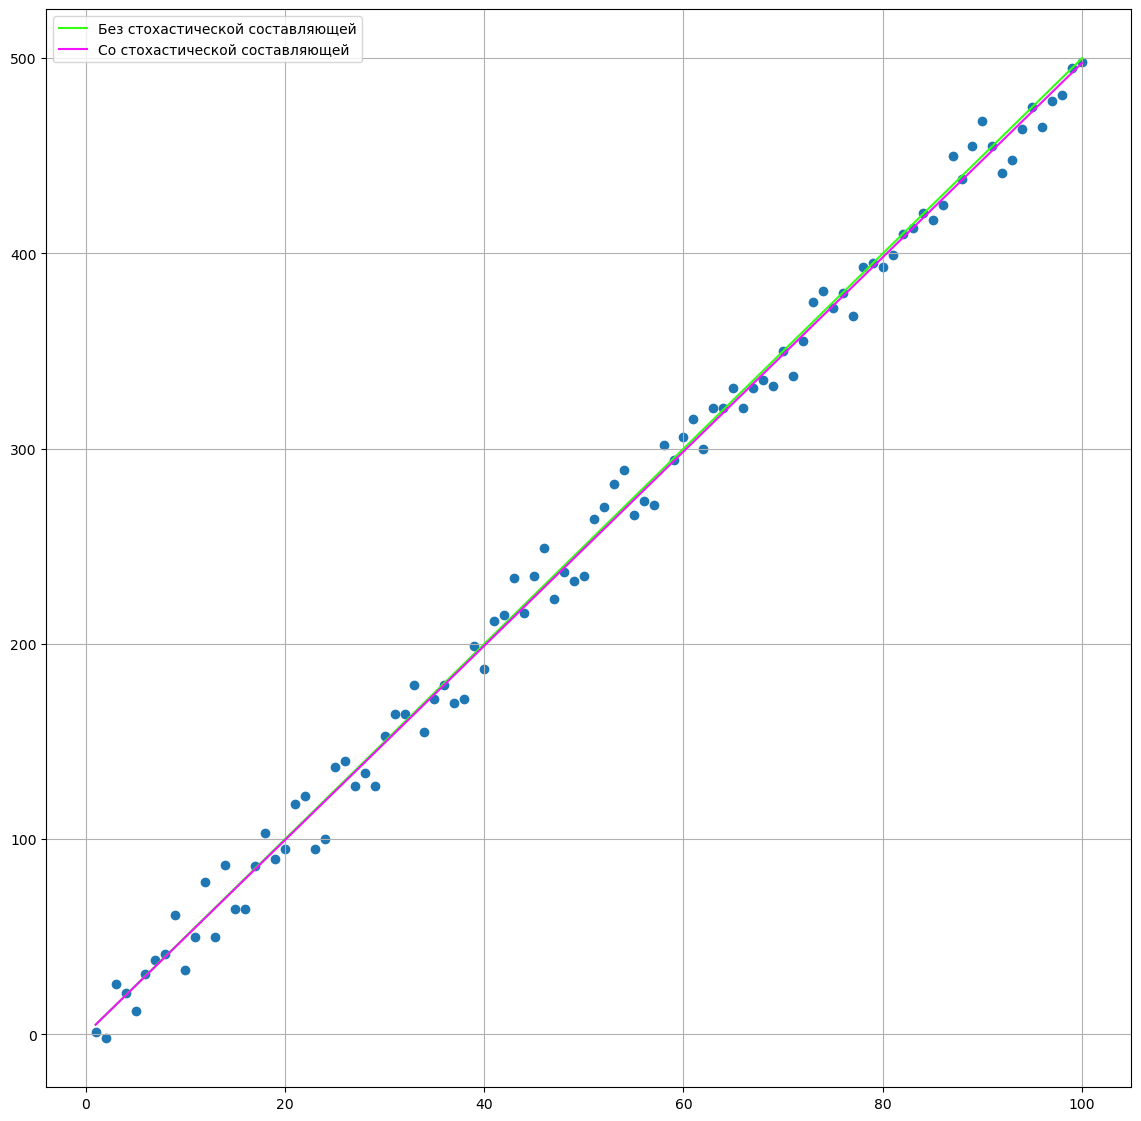

In [135]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.plot(X, 5 * X, color='#33ff12', label='Без стохастической составляющей')
ax.plot(X, round(mdl.intercept_, 3) + round(*mdl.coef_, 3) * X, color='#f412fe', label='Со стохастической составляющей')
ax.scatter(X, Y)
ax.legend()
ax.grid(visible=True)

<img src=https://i.ibb.co/d05V2Yj0/Screenshot-20250321-233503-You-Tube.jpg width=210px></img>